DATA Pre-Processing

In [2]:
import math
import statistics
import missingno as msno
import random
import time
from sklearn.model_selection import train_test_split
from IPython.display import display
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
#Import Data Training
dataset = pd.read_csv("https://raw.githubusercontent.com/reziarsyi/Arzi/main/kendaraan_train.csv")
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [4]:
#Import Data Test,Untuk Test data hasil train
dataset_test = pd.read_csv("https://raw.githubusercontent.com/reziarsyi/Arzi/main/kendaraan_test.csv")
dataset_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


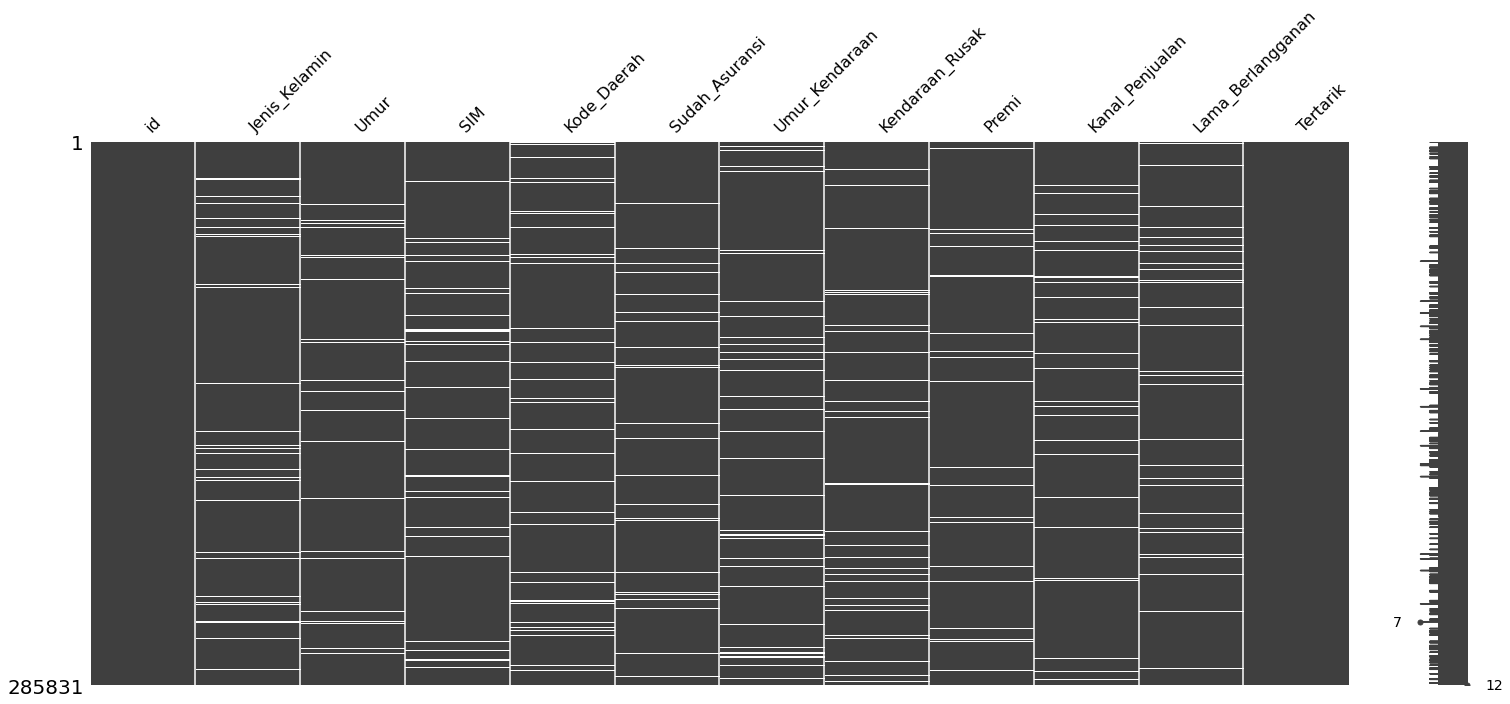

In [5]:
#Untuk Melihat Data NaN (kosong) disetiap kolom
msno.matrix(dataset)

In [6]:
#Untuk Menghitung jumlah data NaN(kosong) pada setiap kolom
print(dataset.isnull().sum())
dataset.shape

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64


(285831, 12)

In [7]:
#Untuk Melihat Tipe Data Setiap Kolom
dataset.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [8]:
#Input data Missing Value(NaN) disetiap Kolom
dataset["Jenis_Kelamin"] = dataset["Jenis_Kelamin"].replace(np.NaN, np.random.choice(a=["Pria","Wanita"],p=[0.54,0.46])) #Dengan Probabilitas
dataset["Umur"] = dataset["Umur"].replace(np.NaN, dataset["Umur"].mean()) #Dengan Rata-Rata
dataset["SIM"] = dataset["SIM"].replace(np.NaN, dataset["SIM"].mean())
dataset["Kode_Daerah"] = dataset["Kode_Daerah"].replace(np.NaN, statistics.mode(dataset["Kode_Daerah"])) 
dataset ["Sudah_Asuransi"] = dataset["Sudah_Asuransi"].replace(np.NaN, np.random.choice(a=[0, 1],p=[0.5417, 0.4583]))
dataset ["Umur_Kendaraan"] = dataset["Umur_Kendaraan"].replace(np.NaN, np.random.choice(a=["< 1 Tahun", "1-2 Tahun", "> 2 Tahun"],p=[0.431, 0.527, 0.042])) 
dataset ["Kendaraan_Rusak"] = dataset["Kendaraan_Rusak"].replace(np.NaN, np.random.choice(a=["Pernah", "Tidak"],p=[0.5355, 0.4645]))
dataset ["Premi"] = dataset["Premi"].replace(np.NaN, dataset["Premi"].mean()) 
dataset["Kanal_Penjualan"] = dataset["Kanal_Penjualan"].replace(np.NaN, 152) 
dataset ["Lama_Berlangganan"] = dataset[ "Lama_Berlangganan"].replace(np.NaN, dataset["Lama_Berlangganan"].mean())

print(dataset.isnull().sum()) 
dataset.shape

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


(285831, 12)

In [9]:
#Konversi Tipe Data
convert_data_types={
    #'id' : int,
    'Jenis_Kelamin' : object,
    'Umur' : int,
    'SIM' : int,
    'Kode_Daerah' : int,
    'Sudah_Asuransi' : int,
    'Umur_Kendaraan' : object,
    'Kendaraan_Rusak' : object,
    'Premi' : int,
    'Kanal_Penjualan' : int,
    'Lama_Berlangganan' : int
}
dataset = dataset.astype(convert_data_types)
dataset_test = dataset_test.astype(convert_data_types)
dataset.dtypes

id                    int64
Jenis_Kelamin        object
Umur                  int64
SIM                   int64
Kode_Daerah           int64
Sudah_Asuransi        int64
Umur_Kendaraan       object
Kendaraan_Rusak      object
Premi                 int64
Kanal_Penjualan       int64
Lama_Berlangganan     int64
Tertarik              int64
dtype: object

In [10]:
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30,1,33,1,< 1 Tahun,Tidak,28029,152,97,0
1,2,Pria,48,1,39,0,> 2 Tahun,Pernah,25800,29,158,0
2,3,Wanita,21,1,46,1,< 1 Tahun,Tidak,32733,160,119,0
3,4,Wanita,58,1,48,0,1-2 Tahun,Tidak,2630,124,63,0
4,5,Pria,50,1,35,0,> 2 Tahun,Tidak,34857,88,194,0


Melakukan Scalling Data pada beberapa kolom

In [11]:
scale_Kendaraan_Rusak = {"Tidak":0,"Pernah":1}
dataset["Kendaraan_Rusak"] = dataset["Kendaraan_Rusak"].replace(scale_Kendaraan_Rusak)
dataset_test["Kendaraan_Rusak"] = dataset_test["Kendaraan_Rusak"].replace(scale_Kendaraan_Rusak)

In [12]:
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30,1,33,1,< 1 Tahun,0,28029,152,97,0
1,2,Pria,48,1,39,0,> 2 Tahun,1,25800,29,158,0
2,3,Wanita,21,1,46,1,< 1 Tahun,0,32733,160,119,0
3,4,Wanita,58,1,48,0,1-2 Tahun,0,2630,124,63,0
4,5,Pria,50,1,35,0,> 2 Tahun,0,34857,88,194,0


In [13]:
scale_Jenis_Kelamin = {"Wanita":0,"Pria":1}
dataset["Jenis_Kelamin"] = dataset["Jenis_Kelamin"].replace(scale_Jenis_Kelamin)
dataset_test["Jenis_Kelamin"] = dataset_test["Jenis_Kelamin"].replace(scale_Jenis_Kelamin)

In [14]:
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0,30,1,33,1,< 1 Tahun,0,28029,152,97,0
1,2,1,48,1,39,0,> 2 Tahun,1,25800,29,158,0
2,3,0,21,1,46,1,< 1 Tahun,0,32733,160,119,0
3,4,0,58,1,48,0,1-2 Tahun,0,2630,124,63,0
4,5,1,50,1,35,0,> 2 Tahun,0,34857,88,194,0


In [15]:
umurKD = pd.get_dummies(dataset["Umur_Kendaraan"], drop_first=True)

In [16]:
dataset = pd.concat([dataset,umurKD], axis=1)

In [17]:
dataset.drop(["Umur_Kendaraan","id","Kode_Daerah","Kanal_Penjualan"], axis=1,inplace=True)

In [19]:
umurKD = pd.get_dummies(dataset_test["Umur_Kendaraan"], drop_first=True)
dataset_test = pd.concat([dataset_test,umurKD], axis=1)
dataset_test.drop(["Umur_Kendaraan","Kode_Daerah","Kanal_Penjualan"], axis=1,inplace=True)

In [20]:
dataset.head()

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik,< 1 Tahun,> 2 Tahun
0,0,30,1,1,0,28029,97,0,1,0
1,1,48,1,0,1,25800,158,0,0,1
2,0,21,1,1,0,32733,119,0,1,0
3,0,58,1,0,0,2630,63,0,0,0
4,1,50,1,0,0,34857,194,0,0,1


MODELLING

1. Menggunakan Metode** LOGISTICS REGRESSION**

In [21]:
#MelakukanFeatureSelection
x1=dataset.iloc[:, [0,1,2,3,4,5,6,8,9]].values
y1=dataset.iloc[:,7].values

x2=dataset_test.iloc[:,[0,1,2,3,4,5,6,8,9]].values
y2=dataset_test.iloc[:,7].values

#DataScalling
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x1 = min_max_scaler.fit_transform(x1)
x2 = min_max_scaler.fit_transform(x2)

#DataSplitting
X_train , X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.3)

#DataKendaraan_TrainClassification_LogisticsRegression
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(class_weight='auto')
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
predictions2 = logmodel.predict(x2)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

from sklearn.metrics import accuracy_score
print("Hasil Akurasi Dari Dataset Kendaraan_Train : ",accuracy_score(y_test,predictions),"\n")

#DataKendaraan_TestClassification_LogisticsRegression
print("Hasil Akurasi dari Dataset Kendaraan_Test : ",accuracy_score(y2,predictions2))

from sklearn.metrics import confusion_matrix
print("")
print("Conffusion Matriks : ")
print(confusion_matrix(y2,predictions2),"\n")

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     75222
           1       0.25      0.00      0.00     10528

    accuracy                           0.88     85750
   macro avg       0.56      0.50      0.47     85750
weighted avg       0.80      0.88      0.82     85750

Hasil Akurasi Dari Dataset Kendaraan_Train :  0.877201166180758 

Hasil Akurasi dari Dataset Kendaraan_Test :  0.8769285669304562

Conffusion Matriks : 
[[41774     4]
 [ 5859     2]] 



2. Menggunakan Metode **KNN(K-Nearest Neighbors)**

Text(0, 0.5, 'Rate Error')

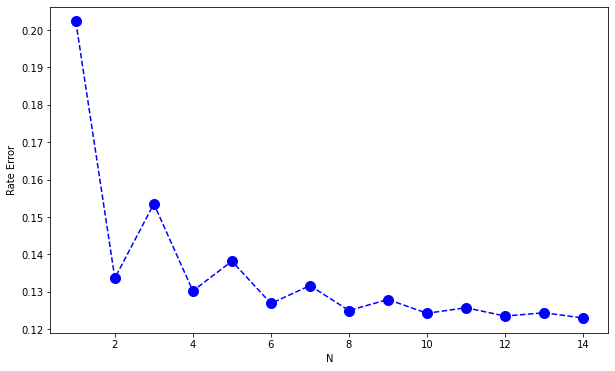

In [23]:
#ImportLibraryKNN
from sklearn.neighbors import KNeighborsClassifier

#FeatureSelection
X1 = dataset.iloc[:,[1,5,6]].values
y1 = dataset.iloc[:,7].values

X2 = dataset_test.iloc[:,[1,5,6]].values
y2 = dataset_test.iloc[:,7].values

#DataScalling
from sklearn import preprocessing

min_max_scaler=preprocessing.MinMaxScaler()
X1 = min_max_scaler.fit_transform(X1)
X2 = min_max_scaler.fit_transform(X2)

#DataSplitting
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3)

#Mencari N terbaik
error_rate = []
for i in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

#Visualisasi N Terbaik
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue',linestyle='dashed',marker='o',markersize=10)
plt.xlabel('N')
plt.ylabel('Rate Error')

In [24]:
print("Nilai N terbaik : ",error_rate.index(min(error_rate))+1)

Nilai N terbaik :  14


In [26]:
#Define The Model
logmodel = KNeighborsClassifier(n_neighbors=14,p=2,metric='euclidean')

#FIT MODEL
logmodel.fit(X_train,y_train)

#Prediction
predictions = logmodel.predict(X_test)
predictions2 = logmodel.predict(X2)

print("Akurasi Menggunakan Dataset KEndaraan_Train : ",accuracy_score(y_test,predictions),"\n")
print("Akurasi Menggunakan Dataset KEndaraan_Test : ",accuracy_score(y2,predictions2))
print("")
print("Confusion Matriks :")
print(confusion_matrix(y2,predictions2),"\n")


Akurasi Menggunakan Dataset KEndaraan_Train :  0.877002915451895 

Akurasi Menggunakan Dataset KEndaraan_Test :  0.8763198219945842

Confusion Matriks :
[[41721    57]
 [ 5835    26]] 

